# Imports de llibreries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import datetime

# Càrrega dels datasets

In [129]:
df_proposals = pd.read_csv("./data/participa.gencat.cat-open-data-proposals.csv")
df_comments = pd.read_csv("./data/participa.gencat.cat-open-data-proposal_comments.csv")

# Exploratory Data Analysis

In [130]:
print(df_proposals.columns)
print(f"Nombre de columnes: {len(df_proposals.columns)}")
print(f"Dimensió del dataset: {df_proposals.shape}")

Index(['id', 'category/id', 'category/name/ca', 'category/name/es',
       'category/name/oc', 'scope/id', 'scope/name/en', 'scope/name/ca',
       'scope/name/es', 'scope/name/oc', 'participatory_space/id',
       'participatory_space/url', 'component/id', 'title/ca', 'body/ca',
       'address', 'latitude', 'longitude', 'state', 'reference', 'answer/en',
       'answer/ca', 'answer/es', 'answer/oc', 'supports',
       'endorsements/total_count', 'endorsements/user_endorsements',
       'comments', 'attachments', 'followers', 'published_at', 'url',
       'meeting_urls', 'related_proposals', 'is_amend',
       'original_proposal/title', 'original_proposal/url', 'category/name/en',
       'title/oc', 'body/oc', 'title/es', 'body/es',
       'original_proposal/title/ca', 'title/en', 'body/en'],
      dtype='object')
Nombre de columnes: 45
Dimensió del dataset: (10440, 45)


Observem que el dataset de propostes té 45 columnes diferents i un total de 10440 files. Per poder seleccionar només les files que ens interessen, agafarem el subset que tingui la url de l'espai participatori corresponent a l'Assemblea Ciutadana pel Clima de Catalunya. En aquest cas és la columna `participatory_space/url`, i la url en concret `http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima`.

In [131]:
df_proposals = df_proposals[df_proposals['participatory_space/url'] == 'http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima']
print(f"Nombre de propostes: {len(df_proposals)}")
df_proposals.head(5)

Nombre de propostes: 59


,id,category/id,category/name/ca,category/name/es,category/name/oc,scope/id,scope/name/en,scope/name/ca,scope/name/es,scope/name/oc,...,original_proposal/title,original_proposal/url,category/name/en,title/oc,body/oc,title/es,body/es,original_proposal/title/ca,title/en,body/en
9622,87446,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9623,87447,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9624,87450,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9625,87451,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9626,87452,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observem a primera vista que existeixen moltes columnes on els valors són NaNs i que potser no ens interessen gaire. Per tant, doncs, eliminem les columnes que continguin íntegrament valors NaNs.

In [132]:
df_proposals = df_proposals.dropna(axis=1)
df_proposals = df_proposals.reset_index(drop=True)
print(f"Nou nombre de columnes: {len(df_proposals.columns)}")
df_proposals.head(1)

Nou nombre de columnes: 15


,id,participatory_space/id,participatory_space/url,component/id,title/ca,body/ca,reference,supports,endorsements/total_count,comments,attachments,followers,published_at,url,is_amend
0,87446,562,http://participa.gencat.cat/processes/assemble...,3827,Participar Assemblea Ciutadana pel Clima de Ca...,"Buenos días, me gustaría participar en la asam...",II-PROP-2023-10-87446,0,4,0,0,2,2023-10-09 13:27:07 +0200,http://participa.gencat.cat/processes/assemble...,False


Un cop eliminades les columnes que només contenien valors NaNs, es redueix el nombre de columnes de 45 a només 15. Una reducció significativa.
Seguim amb el tractament ara del dataset dels comentaris a les propostes.

In [133]:
print(df_comments.columns)
print(f"Nombre de columnes: {len(df_comments.columns)}")
print(f"Dimensió del dataset: {df_comments.shape}")

Index(['id', 'created_at', 'body', 'locale', 'author/id', 'author/name',
       'alignment', 'depth', 'user_group/id', 'user_group/name/en',
       'user_group/name/ca', 'user_group/name/es', 'user_group/name/oc',
       'commentable_id', 'commentable_type', 'root_commentable_url'],
      dtype='object')
Nombre de columnes: 16
Dimensió del dataset: (5171, 16)


Observem que existeixen 16 columnes diferents al dataset i que té 5171 files. Una de les columnes és `commentable_id`, que sembla que és la id de la proposta a la que pertany cada comentari. Així doncs, agafem un subset que contingui només les que coincideixin.

In [134]:
df_comments = df_comments[df_comments['commentable_id'].isin(df_proposals['id'])]
print(f"Nombre de comentaris a les propostes: {len(df_comments)}")
df_comments.head(3)

Nombre de comentaris a les propostes: 14


,id,created_at,body,locale,author/id,author/name,alignment,depth,user_group/id,user_group/name/en,user_group/name/ca,user_group/name/es,user_group/name/oc,commentable_id,commentable_type,root_commentable_url
4937,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,NaN,NaN,NaN,NaN,NaN,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4938,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,NaN,NaN,NaN,NaN,NaN,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4939,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,NaN,NaN,NaN,NaN,NaN,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


En aquest cas, observem que només hi han 14 comentaris a les 59 propostes totals.

In [135]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 4937 to 4952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14 non-null     int64  
 1   created_at            14 non-null     object 
 2   body                  14 non-null     object 
 3   locale                14 non-null     object 
 4   author/id             14 non-null     int64  
 5   author/name           14 non-null     object 
 6   alignment             14 non-null     int64  
 7   depth                 14 non-null     int64  
 8   user_group/id         0 non-null      float64
 9   user_group/name/en    0 non-null      float64
 10  user_group/name/ca    0 non-null      float64
 11  user_group/name/es    0 non-null      float64
 12  user_group/name/oc    0 non-null      float64
 13  commentable_id        14 non-null     int64  
 14  commentable_type      14 non-null     object 
 15  root_commentable_url  14 

Tal com passava amb el dataset de les propostes, existeixen unes quantes columnes amb únicament valors NaN, per tant les eliminem i aconseguim reduir el nombre a 11 columnes.

In [136]:
df_comments = df_comments.dropna(axis=1)
print(f"Nou nombre de columnes: {len(df_comments.columns)}")
df_comments = df_comments.reset_index(drop=True)
df_comments.head(3)

Nou nombre de columnes: 11


,id,created_at,body,locale,author/id,author/name,alignment,depth,commentable_id,commentable_type,root_commentable_url
0,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
1,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
2,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


## Anàlisi dels atributs

### Propostes

#### Id

In [137]:
print(type(df_proposals['id'][0]))
print(len(df_proposals['id']) == df_proposals['id'].nunique())

<class 'numpy.int64'>
True


La columna `id` conté valors numèrics i és un identificador únic de cada proposta diferent. No existeixen ids repetits.

#### Published_at

<class 'str'>
Primera proposta en data: 2023-10-09 11:27:07+00:00
Última proposta en data: 2024-02-10 09:56:54+00:00


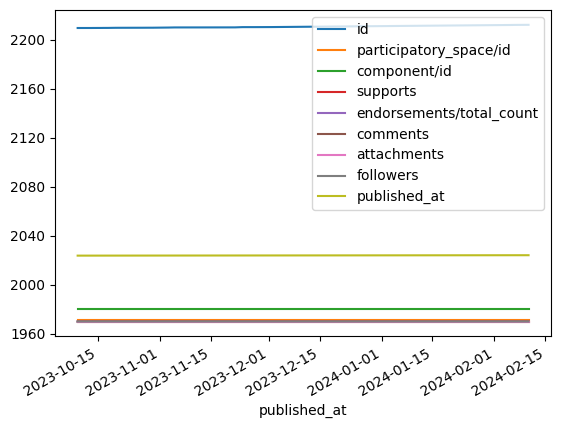

In [138]:
print(type(df_proposals['published_at'][0]))
df_proposals['published_at'] = pd.to_datetime(df_proposals['published_at'], utc=True)
df_proposals.set_index(df_proposals['published_at']).plot()
print(f"Primera proposta en data: {min(df_proposals['published_at'])}")
print(f"Última proposta en data: {max(df_proposals['published_at'])}")

Transformem les dades de la columna `published_at` de string a datetime per poder treballar millor i observem que han passat 4 mesos i 1 dia entre la primera proposta i la última.

In [139]:
# Preparem 4 subsets per fer un plot de la sèrie temporal de cada mes, ja que en total hi ha 4 mesos.
max_data_mes1 = pd.to_datetime('2023-11-09', utc=True)
max_data_mes2 = pd.to_datetime('2023-12-09', utc=True)
max_data_mes3 = pd.to_datetime('2024-01-09', utc=True)
max_data_mes4 = max(df_proposals['published_at'])


df_plot1 = df_proposals[df_proposals['published_at'] <= max_data_mes1]
df_plot2 = df_proposals[(df_proposals['published_at'] >= max_data_mes1) & (df_proposals['published_at'] <= max_data_mes2)]
df_plot3 = df_proposals[(df_proposals['published_at'] >= max_data_mes2) & (df_proposals['published_at'] <= max_data_mes3)]
df_plot4 = df_proposals[(df_proposals['published_at'] >= max_data_mes3) & (df_proposals['published_at'] <= max_data_mes4)]
df_plot1 = df_plot1.reset_index(drop=True)
df_plot2 = df_plot2.reset_index(drop=True)
df_plot3 = df_plot3.reset_index(drop=True)
df_plot4 = df_plot4.reset_index(drop=True)

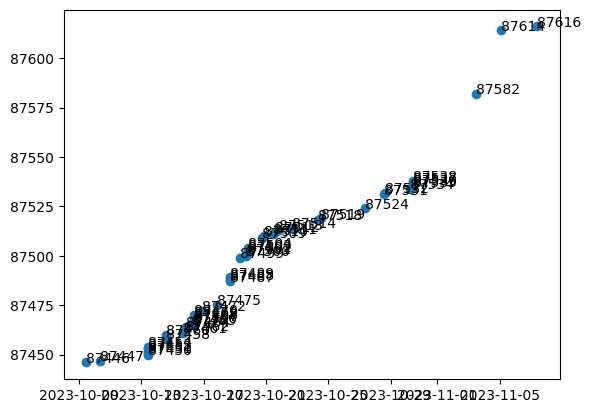

In [140]:
fig, ax = plt.subplots()
ax.scatter(df_plot1['published_at'], df_plot1['id'])

for i, txt in enumerate(df_plot1['id']):
    ax.annotate(txt, (df_plot1['published_at'][i], df_plot1['id'][i]))

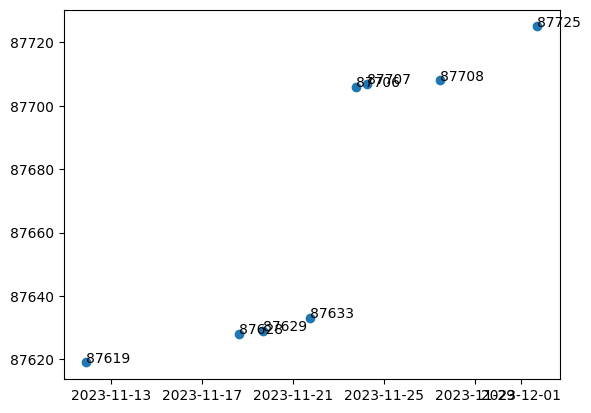

In [141]:
fig, ax = plt.subplots()
ax.scatter(df_plot2['published_at'], df_plot2['id'])

for i, txt in enumerate(df_plot2['id']):
    ax.annotate(txt, (df_plot2['published_at'][i], df_plot2['id'][i]))

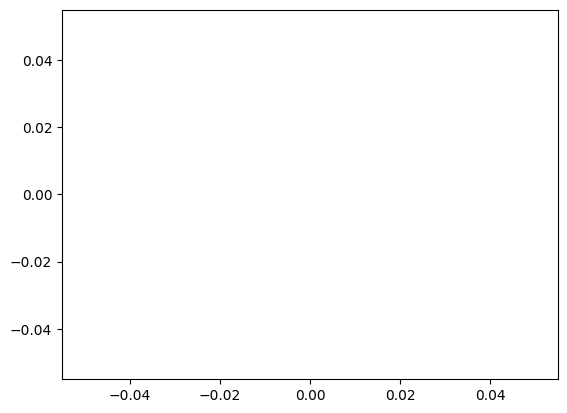

In [142]:
fig, ax = plt.subplots()
ax.scatter(df_plot3['published_at'], df_plot3['id'])

for i, txt in enumerate(df_plot3['id']):
    ax.annotate(txt, (df_plot3['published_at'][i], df_plot3['id'][i]))

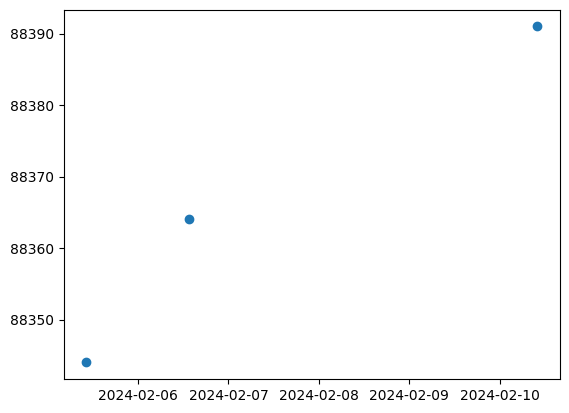

In [143]:
fig, ax = plt.subplots()
ax.scatter(df_plot4['published_at'], df_plot4['id'])

for i, txt in enumerate(df_plot3['id']):
    ax.annotate(txt, (df_plot4['published_at'][i], df_plot4['id'][i]))

In [144]:
print(f"Total propostes primer mes: {len(df_plot1)}")
print(f"Total propostes segon mes: {len(df_plot2)}")
print(f"Total propostes tercer mes: {len(df_plot3)}")
print(f"Total propostes quart mes: {len(df_plot4)}")

Total propostes primer mes: 48
Total propostes segon mes: 8
Total propostes tercer mes: 0
Total propostes quart mes: 3


Es pot observar clarament que durant el primer mes de l'Assemblea Ciutadana pel Clima de Catalunya, hi va haver moltíssimes més propostes que a la resta de mesos, amb 48 propostes. Al segon mes només es va rebre 8 propostes noves, al tercer mes absolutament cap, i finalment al quart mes, només 3 propostes. Veiem per tant que el procés participatiu va tenir una forta arrancada però el ritme de participació va disminuir a mesura que el temps avançava.